### Name : S.M.Hedayatullah
### Enroll No. 0010

# Today K-Nearest Neighbor(KNN), the later K-Means

In [52]:
# ppt
# KNN Uses Euclidean Distance

#  Dataset (Multiclass)

### Name : UpdatedResumeDataset.csv, Sample_resume.txt

### Location : https://drive.google.com/drive/folders/1YujA_GjKigwSJXbRJTkO1l2p1gMmm8ai

## Import the libraries

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read the Data

In [23]:
df = pd.read_csv('UpdatedResumedataset.csv')

In [24]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [25]:
print(df['Resume'][945])   # shows the 945th CV data

PERSONAL SKILLS â¢ Quick learner, â¢ Eagerness to learn new things, â¢ Competitive attitude, â¢ Good leadership qualities, â¢ Ability to deal with people diplomatically. PERSONAL DOSSIER Fathers Name: Dhanraj WaghEducation Details 
January 2012 to January 2016 Bachelors of Engineering Engineering Pune, Maharashtra Pune University
January 2012 Higher Secondary Certificate  Nashik, Maharashtra SND College of Engineering and Research Center
January 2010 Secondary School Certificate  Yeola, Maharashtra Swami Muktanand Jr. College
 HSC   Maharashtra State Board
 SSC   Maharashtra State Bard
 BE  Rajapur, Uttar Pradesh Madhyamik Vidya Mandir Rajapur
Testing and Quality Control Engineer 

Testing and Quality Control Engineer - M/S Rakesh Transformer Industries Pvt. Ltd
Skill Details 
Company Details 
company - M/S Rakesh Transformer Industries Pvt. Ltd
description - Responsibilities:
â¢     To conduct Routine test, Type Test (Temperature Rise Test), Special Test on Transformers as per I

## Separate the Input and Output Data

### Task : Choose a Suitable profile for a given CV

In [26]:
x = df['Resume']
y = df['Category']

In [27]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [53]:
set(y)  # To check how many distinct vales (categories) are present

{'Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing'}

In [29]:
# Let's explore the data if it is Balanced or imbalanced

In [54]:
len(set(y))   # Shows 25 classes are there , meaning its a Multiclass CLassification

25

### Explore the data

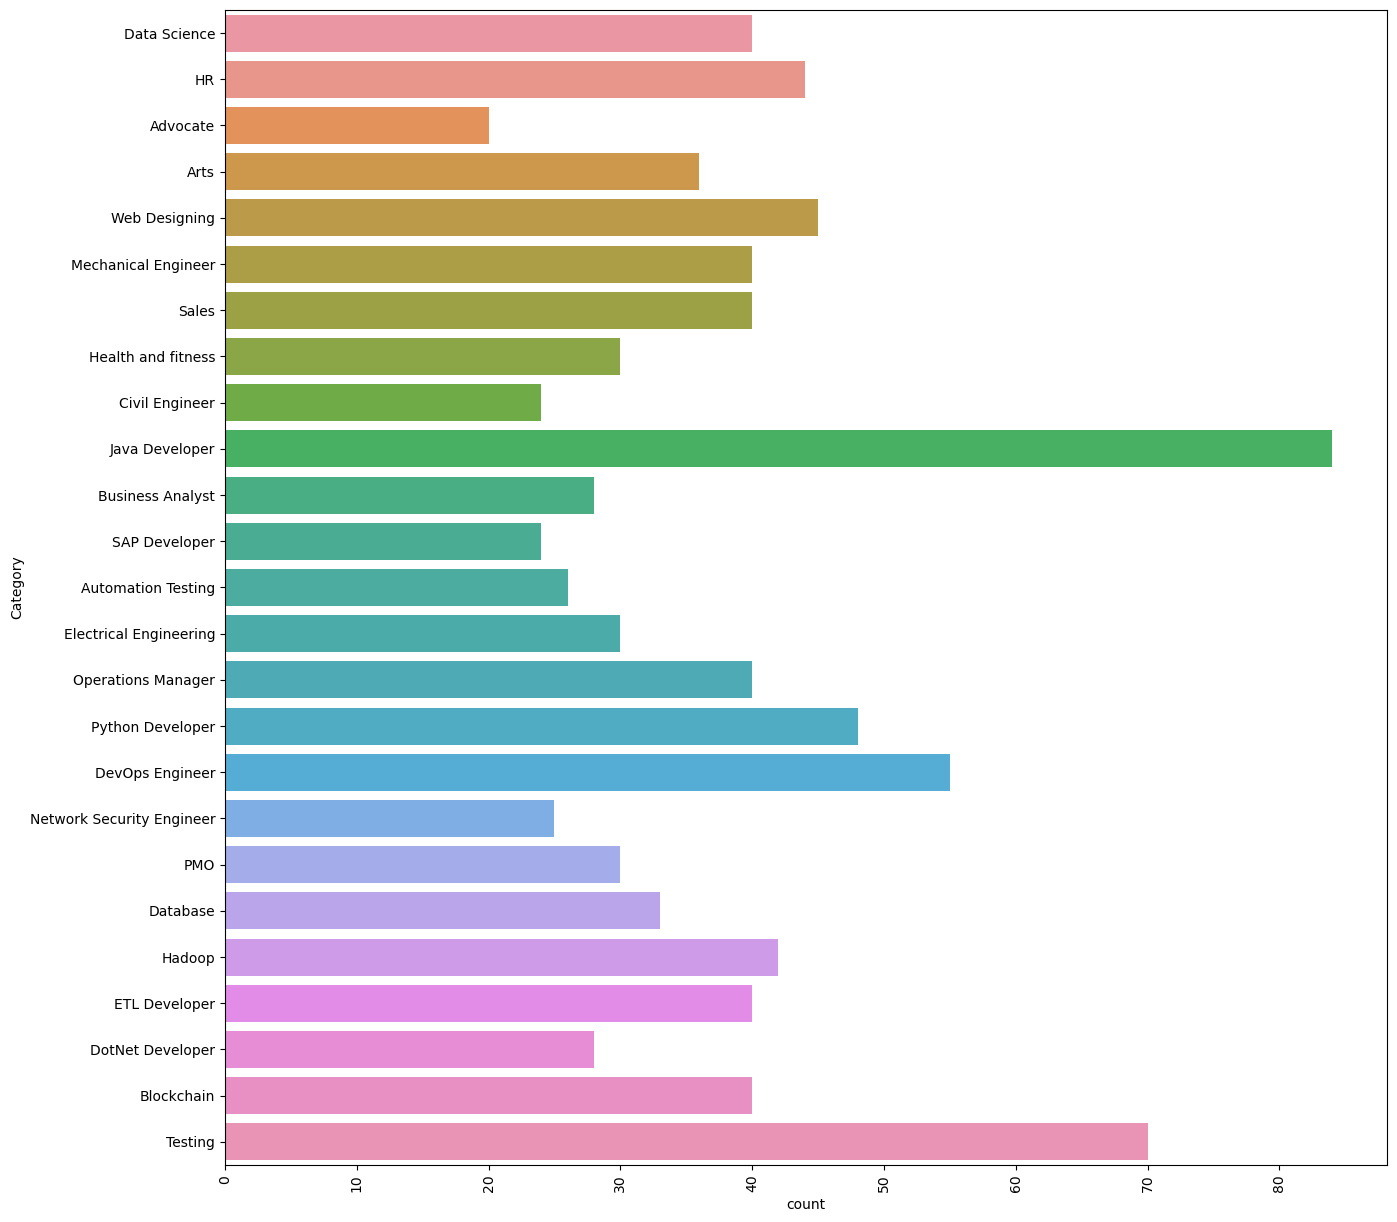

In [56]:
# Let's see Count plot.. Shows it is an imbalanced Data
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y=df['Category']);

In [57]:
y.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

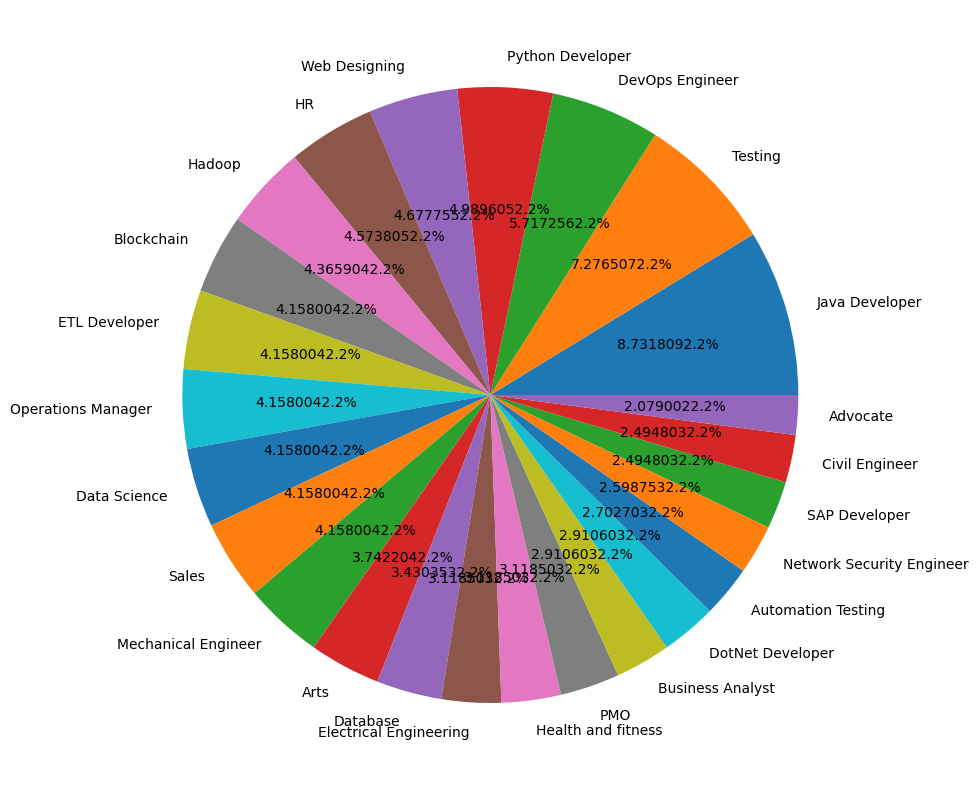

In [58]:
# To show in Pie chart
plt.figure(figsize=(10,10))
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = '%f2.2%%');

In [62]:
# Now cleaning : 
# removing Hash tag , removing @, removing extra spaces , removing RT and CC(Tweeter),
# removing punctuation and other than english letters...replacing with space..

# Will Use Regex for that.. Will use SUb(Substitute Method)

### Data Preparation

#### Data Cleaning

In [45]:
import re, string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
def CleanResume (resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)   # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)   # remove RT and CC
    resumeText = re.sub('#\S+', ' ', resumeText)   # remove hashtags
    resumeText = re.sub('@\S+', ' ' ,resumeText)   # remove mentions
    resumeText = re.sub('[%s]' % re.escape(string.punctuation),' ', resumeText)
    # Remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText) #remove Unicode (ASCII) characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra space
    # remove extra white space
    return resumeText

In [69]:
# Formatted String example
name = 'Tushar'
print('%s' %name)

Tushar


In [70]:
# Will now apply the CleanResume function

# Session 9

In [73]:
# Let's clean resume no. 945 using Our Cleanresume function
CleanResume(df['Resume'][945])

'PERSONAL SKILLS Quick learner Eagerness to learn new things Competitive attitude Good leadership qualities Ability to deal with people diplomatically PERSONAL DOSSIER Fathers Name Dhanraj WaghEducation Details January 2012 to January 2016 Bachelors of Engineering Engineering Pune Maharashtra Pune University January 2012 Higher Secondary Certificate Nashik Maharashtra SND College of Engineering and Research Center January 2010 Secondary School Certificate Yeola Maharashtra Swami Muktanand Jr College HSC Maharashtra State Board SSC Maharashtra State Bard BE Rajapur Uttar Pradesh Madhyamik Vidya Mandir Rajapur Testing and Quality Control Engineer Testing and Quality Control Engineer M S Rakesh Transformer Industries Pvt Ltd Skill Details Company Details company M S Rakesh Transformer Industries Pvt Ltd description Responsibilities To conduct Routine test Type Test Temperature Rise Test Special Test on Transformers as per IS IEC up to 10 MVA 33 KV Class preparing of its test reports Routi

#### Now, let's separate input/output variables

In [79]:
# We could also remove STopwords , but that is not needed here

In [80]:
x = df['Resume']
y = df['Category']

In [81]:
 # Let's vectorize the data   

### TF*IDF Vectorizer

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
tfidf = TfidfVectorizer(stop_words ='english')   # Removes English Stopwords

In [86]:
# Now a different method to clean the Data
# We haven't cleaned the data yet
# We ll separately clean the Data using Lambda function

In [90]:
cleaned = x.apply(lambda a: CleanResume(a))        # Function applied on every Row element and cleans all the data
# other way are also there to use clean function on the whole dataset at once

In [88]:
cleaned

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [91]:
# We have not applied Stopword removal yet

In [92]:
# Let's vectorise the Clean text

In [93]:
x_vect = tfidf.fit_transform(cleaned)

In [94]:
x_vect.shape

(962, 7351)

In [98]:
# Check how many unique words
tfidf.get_feature_names_out()    # gives all imp features whose columns are to be created

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

### Cross validation

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state=0)

In [107]:
x_train.shape    # There are 721 resume in the Train dataset

(721, 7351)

In [108]:
x_test.shape    # There are 241 resume in the Test dataset

(241, 7351)

##### Building the model

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
# Create the object
knn = KNeighborsClassifier()

In [111]:
# Train the algorithm
knn.fit(x_train, y_train)

KNeighborsClassifier()

#### Performance Evaluation

In [113]:
y_pred = knn.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [114]:
y_pred   # Give the best job profile for the test data 

array(['Python Developer', 'Health and fitness', 'Java Developer',
       'Network Security Engineer', 'Java Developer',
       'Health and fitness', 'ETL Developer', 'Health and fitness',
       'Java Developer', 'Electrical Engineering', 'Data Science',
       'Testing', 'Business Analyst', 'Electrical Engineering', 'Hadoop',
       'Business Analyst', 'PMO', 'DevOps Engineer', 'DevOps Engineer',
       'DotNet Developer', 'HR', 'Electrical Engineering',
       'Network Security Engineer', 'Sales', 'PMO', 'Mechanical Engineer',
       'Civil Engineer', 'DevOps Engineer', 'Blockchain', 'Web Designing',
       'Python Developer', 'Operations Manager', 'Sales', 'Database',
       'Testing', 'Testing', 'Sales', 'Operations Manager', 'Database',
       'Python Developer', 'ETL Developer', 'Python Developer',
       'Health and fitness', 'DevOps Engineer', 'Java Developer',
       'Java Developer', 'DevOps Engineer', 'Electrical Engineering',
       'Business Analyst', 'Sales', 'Arts', 'We

In [115]:
# Actual Data
y_test

590             Python Developer
278           Health and fitness
14                  Data Science
678    Network Security Engineer
338               Java Developer
                 ...            
535           Operations Manager
775                       Hadoop
474           Automation Testing
740                     Database
795                ETL Developer
Name: Category, Length: 241, dtype: object

In [118]:
# Now model evaluation through Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

<Figure size 1500x1500 with 0 Axes>

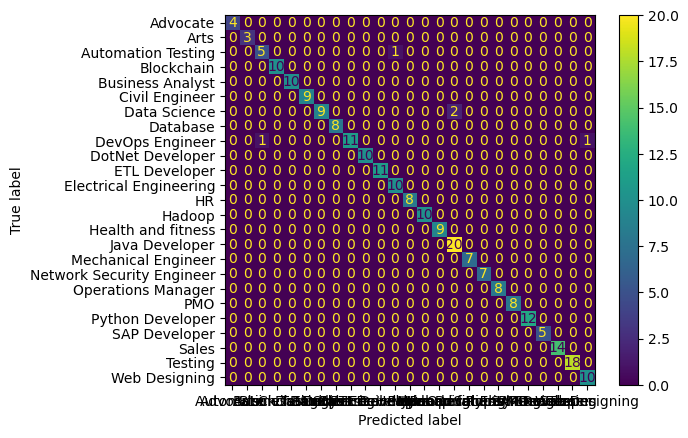

In [124]:
plt.figure(figsize=(15,15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [132]:
# In above diagram we see there are total 5 mismaches

In [133]:
accuracy_score(y_test, y_pred) * 100    # Percent accuracy 

97.9253112033195

In [136]:
236/241     #236 correct matches , 241 is total test data . Hence accuracy is 236/241

0.979253112033195

#### Now check new resume and see the prediction

#### Predict on unseen / new data  

In [137]:
# Sample_resume.txt
# predict the suitable job profile for  this single resume

In [143]:
f = open('Sample_resume.txt')
data = f.read()

In [144]:
data_new = CleanResume(data)

In [145]:
# Transform into TF IDF
data_clean = tfidf.transform([data])

In [146]:
data_clean.shape

(1, 7351)

In [148]:
# Now we can predict
knn.predict(data_clean)

array(['Data Science'], dtype=object)

#### This above was Multi_class classification and it was a supervised ML

# Unsupervised learning and Clustering

##### ppt  - "Clustering" and Association

In [151]:
# For NLP we commonly use Clustering.

### Dataset

In [152]:
# headlines.csv
# Location : mitu website

#### Import the libraries

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 